In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
#import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

def get_ohe(df, col):
    ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False, dtype='int')
    ohe.fit(df[[col]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=ohe.get_feature_names())
    # If you have a newer version, replace with columns=ohe.get_feature_names_out()
    df.drop(columns=[col], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [2]:
data = pd.read_csv('College_subset_islr.csv')
data.head()
sub_set = data.drop(columns = ['id','College','Private'],axis = 1)
sub_set.head()
data.head()


#data.append(data_mit)
#sub_set.append(data_mit)
#print(sub_set)


,id,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,Auburn University-Main Campus,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.70,18,6642,69
1,1,Baylor University,Yes,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.50,38,7503,72
2,2,Boston University,Yes,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.90,16,16836,72
3,3,Bowling Green State University,No,9251,7333,3076,14,45,13699,1213,7452,3352,600,1700,81,89,21.10,14,6918,67
4,4,Brigham Young University at Provo,Yes,7365,5402,4615,48,82,27378,1253,2340,3580,860,1220,76,76,20.50,40,7916,33


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.70,18,6642,69
1,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.50,38,7503,72
2,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.90,16,16836,72
3,9251,7333,3076,14,45,13699,1213,7452,3352,600,1700,81,89,21.10,14,6918,67
4,7365,5402,4615,48,82,27378,1253,2340,3580,860,1220,76,76,20.50,40,7916,33


,id,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,Auburn University-Main Campus,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.70,18,6642,69
1,1,Baylor University,Yes,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.50,38,7503,72
2,2,Boston University,Yes,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.90,16,16836,72
3,3,Bowling Green State University,No,9251,7333,3076,14,45,13699,1213,7452,3352,600,1700,81,89,21.10,14,6918,67
4,4,Brigham Young University at Provo,Yes,7365,5402,4615,48,82,27378,1253,2340,3580,860,1220,76,76,20.50,40,7916,33


In [3]:
sub_set['Enroll'].mean()
sub_set['Enroll'].std()

2142.413043478261

1447.8218671291015

In [4]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns


In [5]:
# correl = subset_data.corr()
correl = sub_set.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data1=[trace]
plotly.offline.iplot(data1, filename='basic-heatmap')

In [6]:
data.columns

cols = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data = pd.DataFrame(sc.fit_transform(data[cols]), columns = data[cols].columns, index = data.index)



Index(['id', 'College', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [7]:
# Check if PCA using SVD gives same results
from sklearn.decomposition import PCA
# initializing the PCA transformer
pca = PCA(n_components = 3)
# dimensionality reduction:
data_pca = pd.DataFrame(pca.fit_transform(data), index = data.index)

46


Text(-2.3122426163520333, 0.1269857086443777, '0')

Text(-1.9375537965282092, -1.3226055765463498, '1')

Text(-0.7237403731952929, 2.9513583952596307, '2')

Text(-3.012652212893119, -0.1736978477781916, '3')

Text(-3.431982099973633, 0.33310805049197223, '4')

Text(3.5539085208454604, 0.918893372134447, '5')

Text(-2.1601856297404196, -1.0122210521145742, '6')

Text(2.0467259843308767, -0.1348554714978398, '7')

Text(2.410261899498462, -0.9881036985566206, '8')

Text(-1.7792839662821964, -0.6048137893311836, '9')

Text(4.076449359883265, -0.25707407139794697, '10')

Text(-0.1488723943089386, -3.4026790961193596, '11')

Text(4.400402542720863, 0.27347977006745844, '12')

Text(3.265202235651306, -1.319441054395912, '13')

Text(3.75158276833075, 1.1730678173457678, '14')

Text(3.514219176013855, 0.4097629634905013, '15')

Text(0.039991797972128616, -2.550841612448273, '16')

Text(-2.1323917403671735, -1.2065843031230605, '17')

Text(1.0276822355794086, -0.47759590187353895, '18')

Text(2.6706900858336775, 0.3354675892999268, '19')

Text(0.38116928839581915, 0.15381223597741414, '20')

Text(-4.580036903611128, -1.9920466607624725, '21')

Text(4.083384680617272, 1.4495136023682798, '22')

Text(4.583120866800017, -1.1195012333058199, '23')

Text(0.5438095900462553, -2.6517474761398376, '24')

Text(-2.857015325128389, 0.36474270539438536, '25')

Text(4.558602406818283, 0.5407638674040087, '26')

Text(-3.482668600860083, -0.5344142664790359, '27')

Text(-2.7373477276284865, -1.1419679152308198, '28')

Text(-3.759625812164779, 4.617568089859503, '29')

Text(1.2684684735312621, -1.070891601601818, '30')

Text(-0.539770574132947, -0.18909103560436288, '31')

Text(-3.184519090397895, 3.7594895699917728, '32')

Text(1.9253283081175836, -0.14764264371476776, '33')

Text(0.2576725511620305, 3.4395113159391846, '34')

Text(-2.9466438997110607, -0.3678437283407913, '35')

Text(-2.178530652677918, -2.229506281080212, '36')

Text(-1.8965698856735023, -0.40255464711973954, '37')

Text(2.2152127019815104, 0.24423951202063698, '38')

Text(-2.55649742722317, -0.8989392306339014, '39')

Text(-2.45700064190994, -0.46524823362863293, '40')

Text(3.243889209783916, 1.7548259359056702, '41')

Text(-3.4585587844591608, 3.658507859975308, '42')

Text(-2.5425394245209394, 2.001499217868236, '43')

Text(4.402578954298989, 0.9241861533215298, '44')

Text(-1.4041240584725825, -2.7688753039349487, '45')

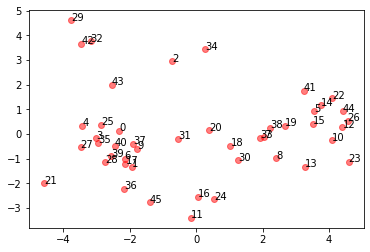

In [8]:
plt.plot(data_pca[0],data_pca[1], 'ro', alpha = 0.5)
print(len(data_pca))
for i in range(len(data_pca)):
    plt.text(data_pca.loc[i][0], data_pca.loc[i][1], str(i)) # cereal_data['name']) # 

plt.show()

In [9]:
data_mit = pd.read_csv('MIT_from_islr.csv')
data_mit.head()
#data_mit = data_mit.drop(columns = ['id','College','Private'],axis = 1)


,id,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.10,35,33541,94


In [10]:
test_data = pd.DataFrame(sc.transform(data_mit[cols]), columns = data_mit[cols].columns, index = data_mit.index)
test_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.43,-0.85,-0.74,1.72,1.17,-0.76,-0.82,1.40,0.81,0.70,0.05,1.40,1.23,-0.53,0.77,1.70,1.12


In [11]:

our_pca = pd.DataFrame(pca.transform(test_data), index = test_data.index)
our_pca.head()

,0,1,2
0,3.93,0.15,1.20


In [13]:
data_pca['dist'] = ((data_pca[0]-our_pca[0].values)**2+(data_pca[1]-our_pca[1].values)**2+(data_pca[2]-our_pca[2].values)**2)**0.5
data_pca

,0,1,2,dist
0,-2.31,0.13,0.08,6.34
1,-1.94,-1.32,-2.51,7.09
2,-0.72,2.95,-2.36,6.49
3,-3.01,-0.17,-0.54,7.16
4,-3.43,0.33,-1.42,7.81
5,3.55,0.92,0.67,1.01
6,-2.16,-1.01,-1.00,6.58
7,2.05,-0.13,-0.84,2.79
8,2.41,-0.99,0.64,1.98
9,-1.78,-0.60,-0.10,5.90
